In [75]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [76]:
fake = Faker()

In [77]:
def custom_email():
    email_prefix = fake.email().split('@')[0]
    return f"{email_prefix}@abc.com"

## Using  Python script to generate synthetic Customer Journey data

#### Using the Faker library in Python, we generate synthetic customer data with specific conditions and features to create a realistic dataset. This randomly generated data is helping in predicting the preferred marketing channel for customers.

In [78]:
num_unique_customers = 10000
num_records = 60000
customers = []
for i in range(1, num_unique_customers + 1):
    customer_id = f'ABC{str(i).zfill(7)}'
    customer_name = fake.name()
    customer_age = random.randint(18, 70)
    customer_gender = random.choice(['Male', 'Female'])
    customer_email = custom_email()

    if 18 <= customer_age <= 30:
        interaction_channel = random.choice(['Website', 'Social Media'])
    elif 31 <= customer_age <= 50:
        interaction_channel = random.choice(['Website', 'Email', 'Phone Call', 'SMS'])
    else:
        interaction_channel = random.choice(['Phone Call', 'SMS'])

    interaction_time = fake.time()
    customers.append({
        'CustomerID': customer_id,
        'CustomerName': customer_name,
        'CustomerAge': customer_age,
        'CustomerGender': customer_gender,
        'CustomerEmail': customer_email,
        'InteractionChannel': interaction_channel,
        'InteractionTime': interaction_time
    })

In [79]:
data = []
for _ in range(num_records):
    customer = random.choice(customers)
    transaction_amount = round(random.uniform(10.0, 1000.0), 2)
    transaction_date = fake.date_time_this_year()
    interaction_date = fake.date_between_dates(transaction_date.date(), transaction_date.date() + timedelta(days=7))
    interaction_time2 = datetime.strptime(customer['InteractionTime'], "%H:%M:%S").time()
    interaction_timestamp = datetime.combine(interaction_date, interaction_time2)
    day_of_week = interaction_timestamp.strftime("%A")
    time_of_day = interaction_timestamp.strftime("%H:%M:%S")
    if customer['InteractionChannel'] in ['Website', 'Email']:
        transaction_amount *= random.uniform(1.0, 1.5)
    elif customer['InteractionChannel'] in ['Phone Call', 'SMS']:
        transaction_amount *= random.uniform(0.5, 1.0)
    else:
        transaction_amount *= random.uniform(0.8, 1.2)
    event = random.choice(['None', 'Holiday', 'Festival'])
    if event == 'Holiday':
        transaction_amount *= 1.2
    elif event == 'Festival':
        transaction_amount *= 1.5

    data.append({
        'CustomerID': customer['CustomerID'],
        'CustomerName': customer['CustomerName'],
        'CustomerAge': customer['CustomerAge'],
        'CustomerGender': customer['CustomerGender'],
        'CustomerEmail': customer['CustomerEmail'],
        'TransactionAmount': round(transaction_amount, 2),
        'TransactionDate': transaction_date,
        'InteractionTimestamp': interaction_timestamp,
        'DayOfWeek': day_of_week,
        'TimeOfDay': time_of_day,
        'InteractionChannel': customer['InteractionChannel'],
        'Event': event
    })

In [80]:
df = pd.DataFrame(data)

In [81]:
df.sample(5)

,CustomerID,CustomerName,CustomerAge,CustomerGender,CustomerEmail,TransactionAmount,TransactionDate,InteractionTimestamp,DayOfWeek,TimeOfDay,InteractionChannel,Event
53881,ABC0007243,Dennis Sims,46,Female,morrisonshawn@abc.com,764.53,2024-01-20 08:40:16,2024-01-23 04:29:29,Tuesday,04:29:29,Email,Festival
9846,ABC0009469,Peter Vargas,32,Male,johnsonjason@abc.com,597.38,2024-02-22 09:51:48,2024-02-28 07:13:54,Wednesday,07:13:54,SMS,None
33537,ABC0006846,Tiffany Barton,63,Female,bellrobert@abc.com,1187.06,2024-05-09 21:46:37,2024-05-10 22:35:38,Friday,22:35:38,Phone Call,Festival
42787,ABC0004190,Wendy House,70,Male,justin84@abc.com,633.20,2024-01-18 17:53:20,2024-01-23 12:37:29,Tuesday,12:37:29,Phone Call,Holiday
47827,ABC0004777,Ashley Blanchard,57,Male,bhardy@abc.com,255.08,2024-03-30 22:58:07,2024-04-01 22:40:39,Monday,22:40:39,SMS,Holiday


## Feature Engineering

##### The 'IsWeekend' feature tells us if a customer interaction happened on a weekend. If the interaction was on a Saturday or Sunday, it gets a value of 1, and if it's on any other day, it gets a value of 0. This helps us see if there's a difference in how customers behave on weekends compared to weekdays

In [82]:
df['IsWeekend'] = (df['DayOfWeek'].isin(['Saturday', 'Sunday'])).astype(int)

##### The 'TimeSlot' feature divides interactions into four parts of the day: Night, Morning, Afternoon, and Evening. This helps us understand how customers engage at different times

In [83]:
df['TimeSlot'] = pd.cut(pd.to_datetime(df['TimeOfDay'], format='%H:%M:%S').dt.hour, bins=4, labels=['Night', 'Morning', 'Afternoon', 'Evening'])

##### The 'AgeGroup' feature groups customers into different age ranges: 18-30, 31-45, 46-60, and 61+. This helps us see how different age groups prefer different marketing channels

In [84]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '61+'])

In [85]:
df.sample(4)

,CustomerID,CustomerName,CustomerAge,CustomerGender,CustomerEmail,TransactionAmount,TransactionDate,InteractionTimestamp,DayOfWeek,TimeOfDay,InteractionChannel,Event,IsWeekend,TimeSlot,AgeGroup
51488,ABC0008043,Kimberly Fuentes,45,Female,henryorr@abc.com,122.53,2024-03-28 03:50:21,2024-04-03 22:16:29,Wednesday,22:16:29,Phone Call,Festival,0,Evening,31-45
48707,ABC0006963,Richard Jones,22,Female,kevin56@abc.com,27.96,2024-01-19 23:04:39,2024-01-25 20:04:08,Thursday,20:04:08,Social Media,Festival,0,Evening,18-30
47740,ABC0005083,Madison Ruiz,69,Female,brittanybaker@abc.com,511.02,2024-01-06 00:03:28,2024-01-08 20:44:45,Monday,20:44:45,SMS,Holiday,0,Evening,61+
41587,ABC0004683,Angela Bryan,67,Female,timothytaylor@abc.com,624.06,2024-01-04 15:00:12,2024-01-04 20:07:43,Thursday,20:07:43,Phone Call,None,0,Evening,61+


### Customer Segmentation using RFM Analysis

######  RFM analysis is used to understand and categorize customers based on their past behavior.
######  1.Recency :- It looks at how recently a customer made a purchase. Customers who bought recently are likely to buy again soon.
######  2.Frequency: It checks how often a customer buys. Customers who buy frequently are more engaged and valuable.
######  3.Monetary: It measures how much money a customer spends. Customers who spend more are typically more profitable.

######  By analyzing these three factors, businesses can identify their best customers.RFM analysis helps in understanding customer behavior and maximizing the value of each customer to the business.

In [86]:
current_datetime = datetime.now()
rfm_df = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_datetime - x.max()).days,
    'CustomerID': 'count',
    'TransactionAmount': 'sum'
}).rename(columns={'TransactionDate': 'Recency', 'CustomerID': 'Frequency', 'TransactionAmount': 'Monetary'})

In [87]:
def assign_rfm_scores(series, quantiles, labels):
    bins = pd.qcut(series, quantiles, duplicates='drop')
    num_bins = bins.cat.categories.size
    new_labels = labels[:num_bins]
    return pd.qcut(series, quantiles, labels=new_labels, duplicates='drop')

rfm_df['R'] = assign_rfm_scores(rfm_df['Recency'], 5, [5, 4, 3, 2, 1])
rfm_df['F'] = assign_rfm_scores(rfm_df['Frequency'], 5, [1, 2, 3, 4, 5])
rfm_df['M'] = assign_rfm_scores(rfm_df['Monetary'], 5, [1, 2, 3, 4, 5])

In [88]:
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

In [89]:
bins = [0, 5, 10, 15]
labels = ['Low Level Profile', 'Mid Level Profile', 'High Level Profile']
rfm_df['CustomerProfile'] = pd.cut(rfm_df['RFM_Score'], bins=bins, labels=labels, include_lowest=True)

In [90]:
rfm_df.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,CustomerProfile
0,ABC0000001,25,6,5360.57,2,3,5,10,Mid Level Profile
1,ABC0000002,11,7,3417.40,4,4,3,11,High Level Profile
2,ABC0000003,2,6,5723.83,5,3,5,13,High Level Profile
3,ABC0000004,59,7,3280.62,1,4,3,8,Mid Level Profile
4,ABC0000005,69,3,946.27,1,1,1,3,Low Level Profile
...,...,...,...,...,...,...,...,...,...
9966,ABC0009996,9,6,4410.64,4,3,4,11,High Level Profile
9967,ABC0009997,10,5,2557.53,4,2,2,8,Mid Level Profile
9968,ABC0009998,17,7,5831.32,3,4,5,12,High Level Profile
9969,ABC0009999,21,5,2636.55,3,2,2,7,Mid Level Profile


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

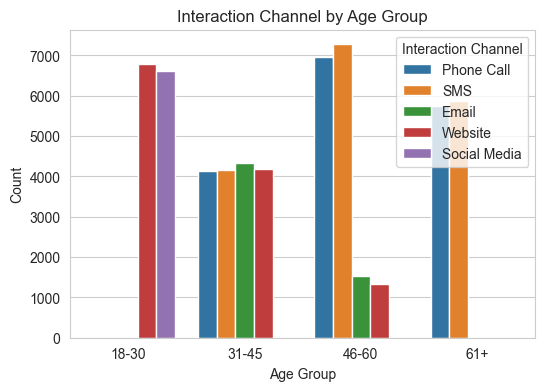

In [105]:
plt.figure(figsize=(6, 4))
sns.countplot(x='AgeGroup', hue='InteractionChannel', data=df)
plt.title('Interaction Channel by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Interaction Channel')
plt.show()

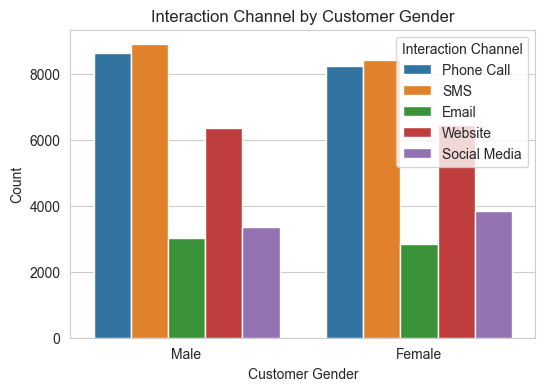

In [104]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CustomerGender', hue='InteractionChannel', data=df)
plt.title('Interaction Channel by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.legend(title='Interaction Channel')
plt.show()

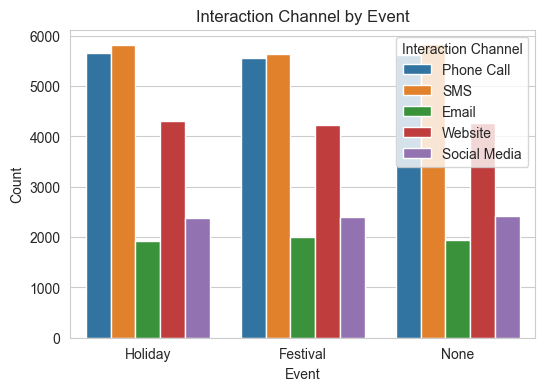

In [103]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Event', hue='InteractionChannel', data=df)
plt.title('Interaction Channel by Event')
plt.xlabel('Event')
plt.ylabel('Count')
plt.legend(title='Interaction Channel')
plt.show()

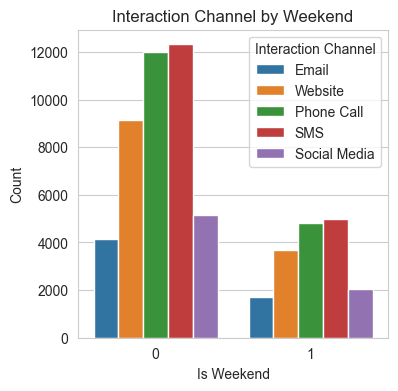

In [101]:
plt.figure(figsize=(4, 4))
sns.countplot(x='IsWeekend', hue='InteractionChannel', data=df)
plt.title('Interaction Channel by Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.legend(title='Interaction Channel')
plt.show()

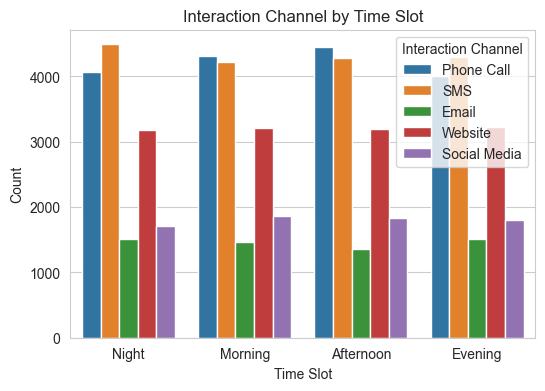

In [102]:
plt.figure(figsize=(6, 4))
sns.countplot(x='TimeSlot', hue='InteractionChannel', data=df)
plt.title('Interaction Channel by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Count')
plt.legend(title='Interaction Channel')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [70]:
X = df[['CustomerAge', 'CustomerGender', 'IsWeekend', 'TimeSlot', 'Event', 'TransactionAmount','DayOfWeek','TimeOfDay']]
y = df['InteractionChannel']

In [71]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = pd.get_dummies(X, columns=['CustomerGender', 'DayOfWeek','TimeOfDay', 'TimeSlot', 'Event'])

scaler = StandardScaler()
X_encoded[['CustomerAge','TransactionAmount','IsWeekend']] = scaler.fit_transform(X_encoded[['CustomerAge','TransactionAmount','IsWeekend']])

### Model Building

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [73]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Email       0.79      0.63      0.70      1145
  Phone Call       0.80      0.92      0.86      3450
         SMS       0.88      0.81      0.84      3347
Social Media       0.83      0.90      0.86      1534
     Website       0.81      0.75      0.78      2524

    accuracy                           0.82     12000
   macro avg       0.82      0.80      0.81     12000
weighted avg       0.83      0.82      0.82     12000



#### Conculsion :- The RandomForestClassifier model shows strong performance in predicting the preferred marketing channel for customers. It achieves balanced precision, recall, and F1-scores across various classes, along with an accuracy is above  80%.